# **Outliers**

https://codanics.com/?s=outliers#google_vignette


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [20]:
df = pd.DataFrame({"Age":[20,21,22,23,24,25,26,27,28,29,30,50]})
df

,Age
0,20
1,21
2,22
3,23
4,24
5,25
6,26
7,27
8,28
9,29


## **Histplot**

<Axes: xlabel='Age', ylabel='Count'>

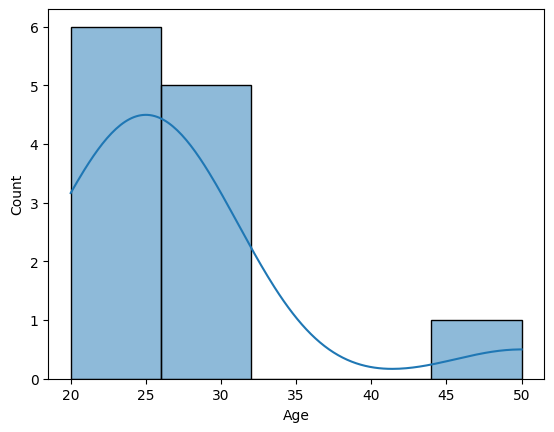

In [21]:
sns.histplot(df['Age'],bins = 5,kde=True)

## **Z-Score**

In [22]:
df['Z-Score'] = (df['Age']-np.mean(df['Age'])) / np.std(df['Age'])
df

,Age,Z-Score
0,20,-0.938954
1,21,-0.806396
2,22,-0.673838
3,23,-0.541280
4,24,-0.408721
5,25,-0.276163
6,26,-0.143605
7,27,-0.011047
8,28,0.121512
9,29,0.254070


In [27]:
#  print outliers
print("-------OUTLIERS-------")
print(df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)])



-------OUTLIERS-------
    Age   Z-Score
11   50  3.037793


In [29]:
df = df[(df['Z-Score']<3)]
df

,Age,Z-Score
0,20,-0.938954
1,21,-0.806396
2,22,-0.673838
3,23,-0.541280
4,24,-0.408721
5,25,-0.276163
6,26,-0.143605
7,27,-0.011047
8,28,0.121512
9,29,0.254070


In [33]:
from scipy import stats
data = pd.DataFrame({"Age":[20,21,22,23,24,25,26,27,28,29,30,50]})
z_score = np.abs(stats.zscore(data['Age']))
filtered_data = data[z_score <= 3]
print(filtered_data)


    Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


## **IQR METHOD**

In [44]:
data = pd.DataFrame({"Age":[20,21,22,23,24,25,26,27,28,29,30,50]})
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

IQR = Q3-Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

print("---Outliers---")
outlier = data[(data['Age']>upper) | (data['Age']<lower)]
print(outlier)
filterdata = data[(data['Age']<=upper) & (data['Age']>=lower)]
print("---Filtered Data---")
print(filterdata)

---Outliers---
    Age
11   50
---Filtered Data---
    Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
